In [20]:
import gauss_siedel as gs
import jacobi as jb

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
eq = [
    "10*x1 - x2 + 2*x3 + x5 - 19",
    "-x1 + 11*x2 - x3 + 3*x4 - 30",
    "2*x1 - x2 + 10*x3 - x4 + 3*x5 - 41",
    "3*x2 - x3 + 8*x4 - x5 - 30",
    "x1 - 2*x2 + 3*x3 - 4*x4 + 11*x5 - 45",
    "4*x3 - 2*x5 + x6 - 8",
    "-3*x4 + 2*x7 - 2",
    "6*x1 - 2*x2 + x4 + 5*x6 - 3*x8 - 12",
]

In [23]:
_n_iter = 25

In [24]:
jacobi = jb.Jacobi(eq)

jacobi.solve(n_iter=_n_iter)

[1.00000041986534,
 1.99999959339239,
 3.00000068579789,
 3.99999944923203,
 5.00000081000374,
 6.00000182039956,
 7.00000133969271,
 7.99999356714127]

In [25]:
gauss = gs.GaussSiedel(eq)

gauss.solve(n_iter=_n_iter)

[1.00000000000000,
 2.00000000000000,
 3.00000000000000,
 4.00000000000000,
 5.00000000000000,
 6.00000000000000,
 7.00000000000000,
 8.00000000000000]

In [26]:
history_gauss = gauss.get_iterations()

In [27]:
history_jacobi = jacobi.get_iterations()

C:\Users\Helmy\AppData\Local\Temp\ipykernel_2704\3458078904.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


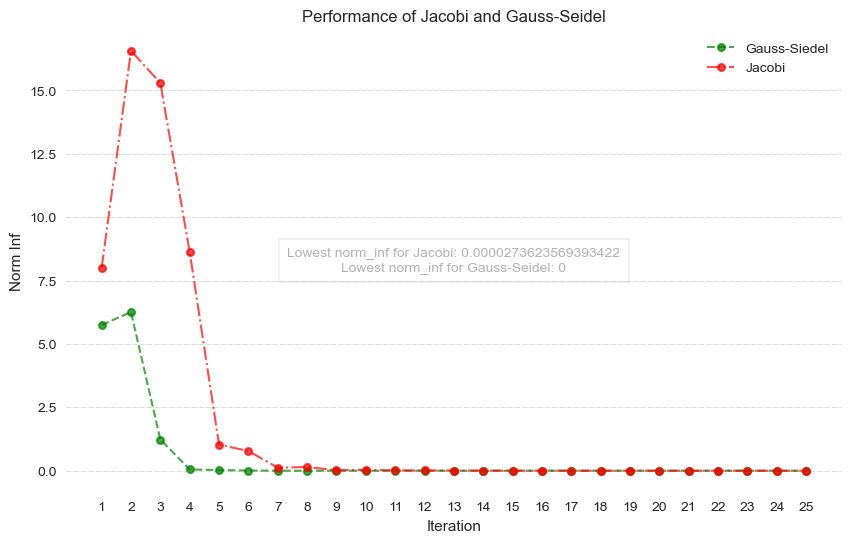

In [33]:
norm_inf_gauss = [history_gauss[i]["norm_inf"] for i in range(1, len(history_gauss))]
norm_inf_jacobi = [history_jacobi[i]["norm_inf"] for i in range(1, len(history_jacobi))]

plt.style.use("seaborn")
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(norm_inf_gauss, label="Gauss-Siedel", color="green", marker="o", linestyle="--", linewidth=1.5, markersize=5,
        markerfacecolor="green", markeredgecolor="green", markeredgewidth=1.5, alpha=0.7, zorder=2, clip_on=False)
ax.plot(norm_inf_jacobi, label="Jacobi", color="red", marker="o", linestyle="-.", linewidth=1.5, markersize=5,
        markerfacecolor="red", markeredgecolor="red", markeredgewidth=1.5, alpha=0.7, zorder=2, clip_on=False)
ax.set_xticks(range(0, _n_iter))
ax.set_xticklabels(range(1, _n_iter + 1))
ax.set_xlabel("Iteration")
ax.set_ylabel("Norm Inf")
ax.set_title("Performance of Jacobi and Gauss-Seidel")
ax.grid(color="grey", linestyle="-.", linewidth=0.5, alpha=0.4, zorder=1, clip_on=False, axis="y")

low_value_jacobi = min(norm_inf_jacobi)
low_value_gauss = min(norm_inf_gauss)
plt.text(0.5, 0.5,
         f"Lowest norm_inf for Jacobi: {low_value_jacobi}\nLowest norm_inf for Gauss-Seidel: {low_value_gauss}",
         horizontalalignment="center", verticalalignment="center", transform=ax.transAxes, fontsize=10, color="black",
         alpha=0.3, zorder=1, clip_on=False,
         bbox=dict(boxstyle="square", facecolor="white", edgecolor="black", alpha=0.3, pad=0.6))

ax.legend()
plt.show()